Training Accuracy: 0.9978
Testing Accuracy: 0.8565
Training Log Loss: 0.1192
Testing Log Loss: 0.4200

Classification Report:
              precision    recall  f1-score   support

   Aloe Vera       0.92      0.98      0.95        57
        Amla       0.64      0.80      0.71        49
      Garlic       0.89      0.94      0.92        54
      Ginger       0.94      0.92      0.93        64
        Neem       0.84      0.67      0.74        54
  Sandalwood       0.98      0.92      0.95        62
       Tulsi       0.78      0.80      0.79        56
    Turmeric       0.87      0.79      0.83        57

    accuracy                           0.86       453
   macro avg       0.86      0.85      0.85       453
weighted avg       0.86      0.86      0.86       453



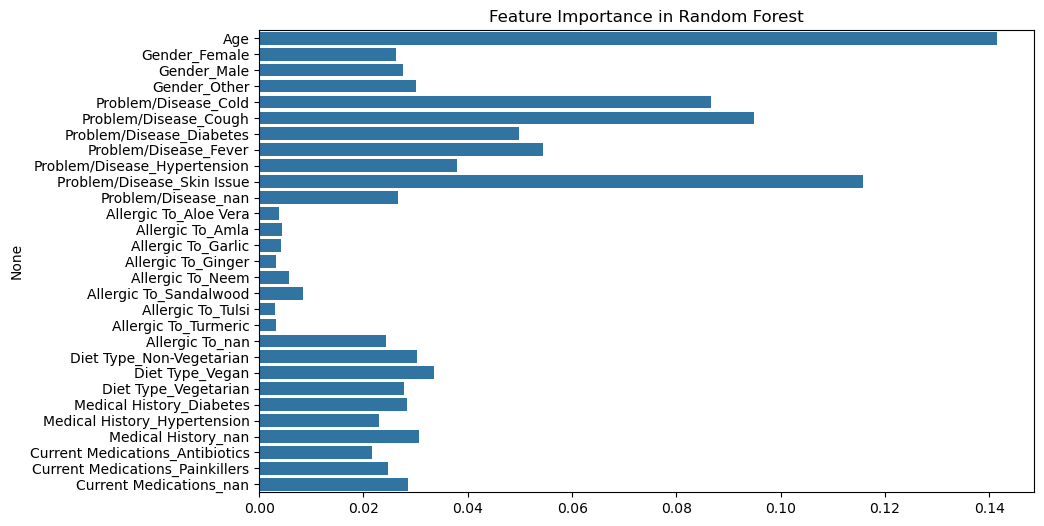

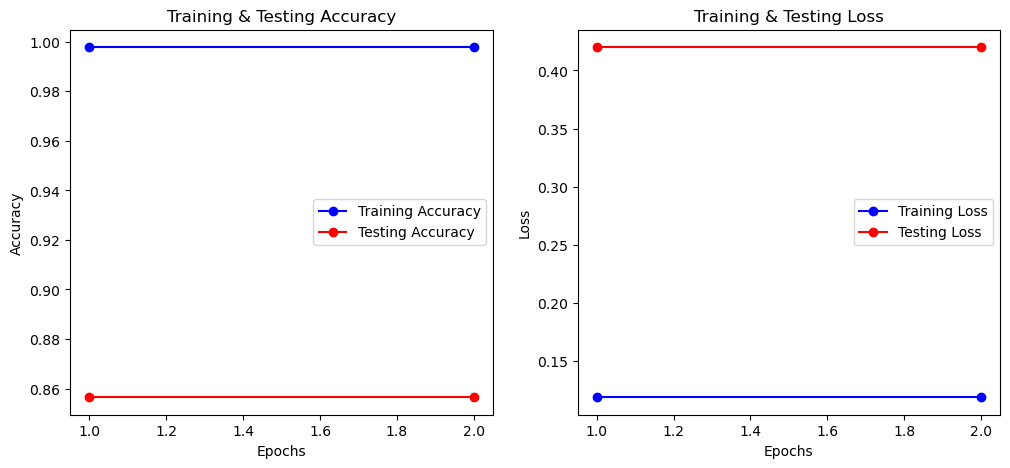

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split

# Load the newly generated biased dataset
df = pd.read_csv("biased_herbal_data.csv")

# Define categorical and numerical columns
categorical_cols = ["Gender", "Problem/Disease", "Allergic To", "Diet Type", "Medical History", "Current Medications"]
numerical_cols = ["Age"]

# One-hot encoding for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert encoded categorical features into DataFrame
encoded_df = pd.DataFrame(categorical_encoded, columns=categorical_feature_names)

# Scale numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Concatenate numerical and encoded categorical data
X = pd.concat([df[numerical_cols], encoded_df], axis=1)
y = df["Recommended Plant"]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest Classifier with optimized hyperparameters
rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute log loss
train_log_loss = log_loss(y_train, rf_model.predict_proba(X_train))
test_log_loss = log_loss(y_test, rf_model.predict_proba(X_test))

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Testing Log Loss: {test_log_loss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Plot feature importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance in Random Forest")
plt.show()

# Plot accuracy and loss
epochs = range(1, 3)
train_acc = [train_accuracy, train_accuracy]
test_acc = [test_accuracy, test_accuracy]
train_loss = [train_log_loss, train_log_loss]
test_loss = [test_log_loss, test_log_loss]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, test_acc, 'ro-', label='Testing Accuracy')
plt.title('Training & Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, test_loss, 'ro-', label='Testing Loss')
plt.title('Training & Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save Label Encoder (for decoding predictions)
joblib.dump(label_encoder, "label_encoder.pkl")

# Save One-Hot Encoder (for encoding categorical features)
joblib.dump(encoder, "onehot_encoder.pkl")

print("✅ Model and encoders saved successfully!")

# ----------- OPTIONAL: Load and Test Saved Model ------------
# Load saved model & encoders
rf_loaded = joblib.load("random_forest_model.pkl")
label_encoder_loaded = joblib.load("label_encoder.pkl")
onehot_encoder_loaded = joblib.load("onehot_encoder.pkl")

# Test prediction using first row from test data
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_class = rf_loaded.predict(sample_data)
predicted_label = label_encoder_loaded.inverse_transform(predicted_class)

print(f"🔍 Predicted Plant: {predicted_label[0]}")


✅ Model and encoders saved successfully!
🔍 Predicted Plant: Neem


C:\Users\Aaditya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example training data
X_train = np.array([[20], [30], [40], [50], [60]])  # Age column as example
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ scaler.pkl has been saved!")


✅ scaler.pkl has been saved!
